# Introduction

In [1]:
"""
What? Gradient boosting regularisation

Reference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py
           https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier
"""

'\nWhat? Gradient boosting regularisation\n\nRevision No: 1\nLast revised: 12/02/21\nReference: https://scikit-learn.org/stable/auto_examples/ensemble/plot_gradient_boosting_regularization.html#sphx-glr-auto-examples-ensemble-plot-gradient-boosting-regularization-py\n           https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier\nGLM\n'

# Import modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn import datasets
from pylab import rcParams
from matplotlib import pyplot

# Create dataset

In [3]:
"""
Generates data for binary classification used in Hastie et al. 2009, Example 10.2.
The ten features are standard independent Gaussian 
https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html#sklearn.datasets.make_hastie_10_2
"""

'\nGenerates data for binary classification used in Hastie et al. 2009, Example 10.2.\nThe ten features are standard independent Gaussian \nhttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_hastie_10_2.html#sklearn.datasets.make_hastie_10_2\n'

In [4]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
X = X.astype(np.float32)

# map labels from {-1, 1} to {0, 1}
labels, y = np.unique(y, return_inverse=True)

X_train, X_test = X[:2000], X[2000:]
y_train, y_test = y[:2000], y[2000:]

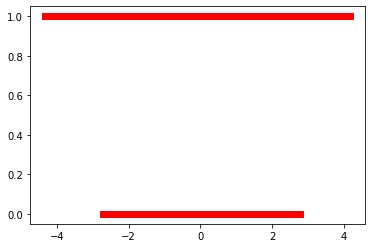

In [5]:
plt.plot(X,y,"rs")
plt.show()

# Plot different option

In [6]:
"""
learning_ratefloat, default=0.1
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate
and n_estimators.

subsamplefloat, default=1.0
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in 
Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads 
to a reduction of variance and an increase in bias.
"""

'\nlearning_ratefloat, default=0.1\nLearning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate\nand n_estimators.\n\nsubsamplefloat, default=1.0\nThe fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in \nStochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads \nto a reduction of variance and an increase in bias.\n'

In [7]:

original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5}

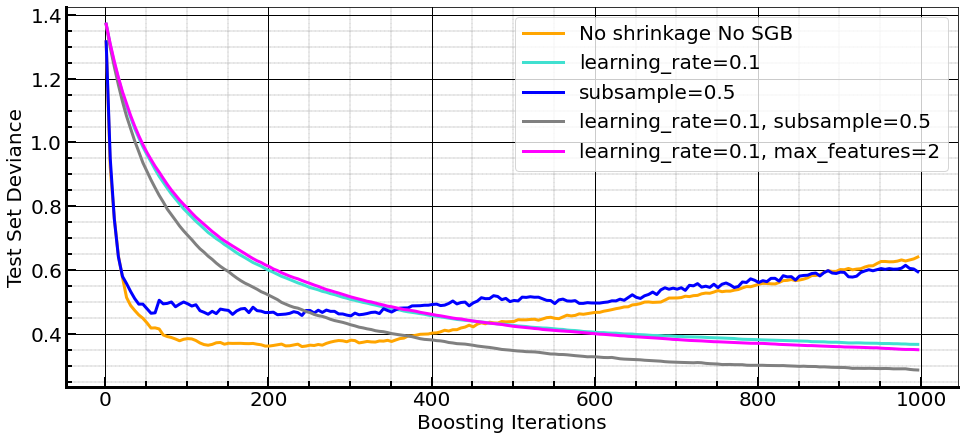

In [8]:
rcParams['figure.figsize'] = 16, 7
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
for label, color, setting in [('No shrinkage No SGB', 'orange',
                               {'learning_rate': 1.0, 'subsample': 1.0}),
                              ('learning_rate=0.1', 'turquoise',
                               {'learning_rate': 0.1, 'subsample': 1.0}),
                              ('subsample=0.5', 'blue',
                               {'learning_rate': 1.0, 'subsample': 0.5}),
                              ('learning_rate=0.1, subsample=0.5', 'gray',
                               {'learning_rate': 0.1, 'subsample': 0.5}),
                              ('learning_rate=0.1, max_features=2', 'magenta',
                               {'learning_rate': 0.1, 'max_features': 2})]:
    params = dict(original_params)
    params.update(setting)
    
    # Model definition
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', lw = 3, color=color, label=label)

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
ax.legend()
pyplot.show()
plt.show()

# Effect of subsampling = stochastic gradient boosting

In [9]:
"""
subsamplefloat, default=1.0
The fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in 
Stochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads 
to a reduction of variance and an increase in bias.
"""

'\nsubsamplefloat, default=1.0\nThe fraction of samples to be used for fitting the individual base learners. If smaller than 1.0 this results in \nStochastic Gradient Boosting. subsample interacts with the parameter n_estimators. Choosing subsample < 1.0 leads \nto a reduction of variance and an increase in bias.\n'

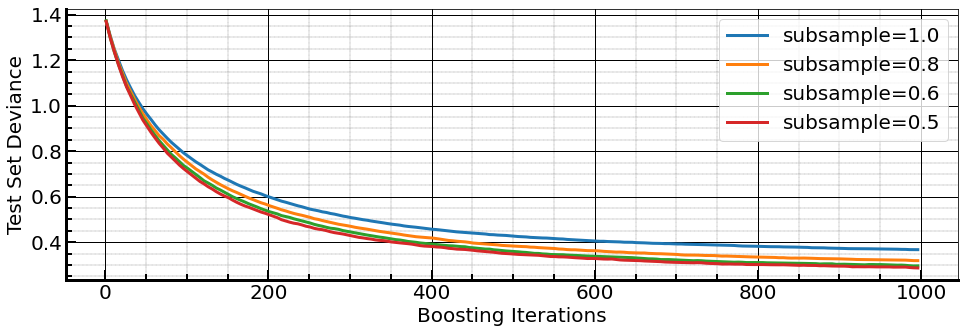

In [10]:
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5, 'learning_rate': 0.1}

rcParams['figure.figsize'] = 16, 5
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
for value in [1.0, 0.8, 0.6, 0.5]:

    # Update the dictionary
    setting = {'subsample': value}        
    params = dict(original_params)
    params.update(setting)
    
    # Model definition
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', lw = 3, label = "subsample=" + str(value))

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
ax.legend()
plt.show()

# Effect of learning rate

In [11]:
"""
learning_ratefloat, default=0.1
Learning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate
and n_estimators.
"""

'\nlearning_ratefloat, default=0.1\nLearning rate shrinks the contribution of each tree by learning_rate. There is a trade-off between learning_rate\nand n_estimators.\n'

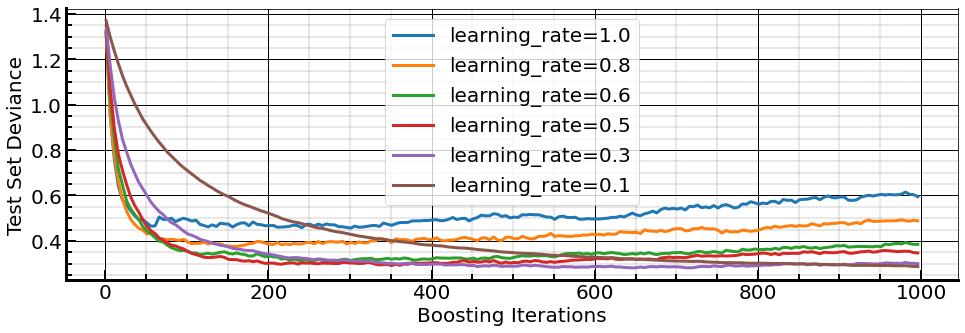

In [12]:
original_params = {'n_estimators': 1000, 'max_leaf_nodes': 4, 'max_depth': None, 'random_state': 2,
                   'min_samples_split': 5, 'subsample': 0.5}

rcParams['figure.figsize'] = 16, 5
rcParams['font.size'] = 20

fig, ax = pyplot.subplots()
for value in [1.0, 0.8, 0.6, 0.5, 0.3, 0.1]:

    # Update the dictionary
    setting = {'learning_rate': value}        
    params = dict(original_params)
    params.update(setting)
    
    # Model definition
    clf = ensemble.GradientBoostingClassifier(**params)
    clf.fit(X_train, y_train)

    # compute test set deviance
    test_deviance = np.zeros((params['n_estimators'],), dtype=np.float64)

    for i, y_pred in enumerate(clf.staged_decision_function(X_test)):
        # clf.loss_ assumes that y_test[i] in {0, 1}
        test_deviance[i] = clf.loss_(y_test, y_pred)

    plt.plot((np.arange(test_deviance.shape[0]) + 1)[::5], test_deviance[::5],
            '-', lw = 3, label = "learning_rate=" + str(value))

plt.legend(loc='upper left')
plt.xlabel('Boosting Iterations')
plt.ylabel('Test Set Deviance')
ax.grid(which = "major", linestyle='-', linewidth='1.0', color='k')
ax.grid(which = "minor", linestyle='--', linewidth='0.25', color='k')
ax.tick_params(which = 'major', direction='in', length=10, width=2)
ax.tick_params(which = 'minor', direction='in', length=6, width=2)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.minorticks_on()
ax.legend()
plt.show()

In [13]:
"""

"""

'\n\n'